<a href="https://colab.research.google.com/github/jefersonfreittas1/Python-Tutorial/blob/main/ex%20aula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UFSM00171 - Métodos Numéricos para Engenharia Química

## Aula 04 - Algoritmos: Exercícios



## 1. Soma de números naturais
Escreva um programa que peça um número `n` do usuário e compute a soma de todos os números naturais até `n` usando um laço `for`.


In [ ]:
n = int(input('Insira um número:'))

soma = 0
for i in range(n+1):
  soma = soma + i

print(f'A soma dos números naturais até {n} é {soma}.')

Insira um número:5
A soma dos números naturais até 5 é 15.


## 2. Sequência Fibonacci
Escreva um programa que imprima na tela os primeiros `n` números de uma sequência Fibonacci usando um laço `while`.

In [ ]:
n = int(input('Insira um número:'))
a, b = 0, 1
contador = 0
while contador < n:
    print(a, end=' ')
    a, b = b, a+b
    contador += 1

Insira um número:10
0 1 1 2 3 5 8 13 21 34 

## 3. Par ou ímpar
Escreva um programa que peça um número para o usuário e cheque se esse número é par ou ímpar utilizando estruturas `if-else`.

In [ ]:
num = int(input('Insira um número: '))
if num % 2 == 0:
  print(f"{num} é par.")
else:
  print(f"{num} é ímpar.")

Insira um número: 5
5 é ímpar.


## 4. Encontre o maior número
Escreva um programa que sorteie aleatoriamente 3 números e imprima na tela o mais alto deles utilizando `if`, `elif` e `else`.

In [ ]:
import numpy as np

a = np.random.random()
b = np.random.random()
c = np.random.random()
if (a > b) and (a > c):
  print(f"a ({a}) é o maior número.")
elif b > a and b > c:
  print(f"b ({b}) é o maior número.")
else:
  print(f"c ({c}) é o maior número.")

b (0.7168174569960148) é o maior número.


In [ ]:
import numpy as np
a,b,c = np.random.randint(100, size=3)
print(a,b,c)

16 73 72


## 5. Números primos
Escreva um programa para checar se um dado número é primo ou não. Utilize as estruturas `for` e `if`.

In [ ]:
num = int(input('Insira um número:'))
primo = True

if num > 1:
    for i in range(2,num):
        if (num % i) == 0:
            primo = False
            break
    if primo:
        print(f"{num} é primo.")
    else:
        print(f"{num} não é primo.")
else:
    print(f"{num} não é primo.")

## 6. Jogo de azar
Escreva um programa em que o usuário tenha que adivinhar um número inteiro de 1 a 10. O programa deve fornecer dicas se o palpite está muito alto ou muito baixo e deve parar quando o usuário acertar a resposta.

In [ ]:
import random
print('Adivinhe o número de 1 a 10')
num_secreto = random.randint(1, 10)
palpite = None

while palpite != num_secreto:
    palpite = int(input('Insira um palpite: '))
    if palpite > num_secreto:
        print('Muito alto!')
    elif palpite < num_secreto:
        print('Muito baixo!')
    else:
        print('Você acertou!')

## 7. Fatorial
Escreva um programa que calcule o fatorial de um número utilizando um laço `for`.

In [ ]:
n = int(input('Insira um número: '))
fatorial = 1

if n < 0:
  print('Não existe fatorial para números negativos.')
elif n == 0:
  print('O fatorial de 0 é 1.')
else:
  for i in range(1, n+1):
    fatorial *= i
  print(f"O fatorial de {n} é {fatorial}.")

Insira um número: 6
O fatorial de 6 é 720.


## 8. Contagem de vogais em uma _string_
Escreva um programa que receba uma _string_ do usuário e conte o número de vogais utilizando estruturas `for`e `if`.

In [ ]:
texto = input('Insira um texto: ').lower()
vogais = 'aeiou'
contador = 0
for caractere in texto:
  if caractere in vogais:
    contador += 1
print(f"O número de vogais no texto é {contador}.")

## 9. Equilíbrio líquido-vapor: Lei de Raoult
Obtenha o diagrama de equilíbrio líquido-vapor $P \ vs \ x,y$ de uma mistura binária de acetona (1) + Água (2) a 393.15 K utilizando as hipóteses de gás ideal e solução ideal. <br>
Dados: <br>
Antoine: $log (P_i ^{sat}) = A_i - \frac{B_i}{T+C_i}$ <br>
Acetona: $A = 4.42448$, $\ B=1312.253$, $\ C=-32.445$ <br>
Água: $A=3.55959$,$\ B=643.748$,$\ C=-198.043$


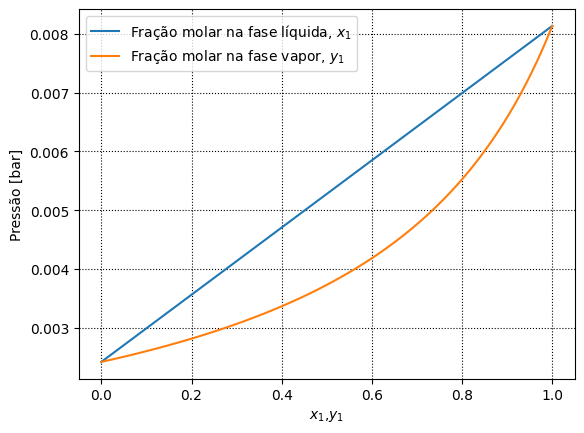

In [ ]:
# Importação das bibliotecas
import numpy as np
import matplotlib.pyplot as plt

# DADOS
# Parâmetros de Antoine
A  = np.array([4.42448, 3.55959])
B  = np.array([1312.253, 643.748])
C  = np.array([-32.445, -198.043])
T  = 393.15 # Temperatura [K]
NC = 2      # Número de componentes
# Vetor das frações molares na fase líquida
xx = np.arange(0, 1.01, 0.01)

# Pré-alocação
Psat = np.zeros(NC)
x    = np.zeros(NC) # [xx, 1-xx]
P    = np.zeros(xx.size) # (101 elementos)
y    = np.zeros((xx.size, NC)) # (101 x 2)

# Pressões de saturação para cada componente
for i in range(NC):
    Psat[i] = 10**(A[i] - B[i]/(T+C[i]))  # mmHg
Psat = Psat*0.00133 # Conversão de mmHg para bar

# Cálculo do Equilíbrio Líquido-Vapor (loop)
for i in range(xx.size):
    x = np.array([xx[i], 1-xx[i]])

    soma = 0
    for k in range(NC):
        soma = soma + x[k]*Psat[k]
    P[i] = soma

    for j in range(NC):
        y[i,j] = x[j]*Psat[j]/P[i]

plt.plot(xx,P,label='Fração molar na fase líquida, $x_1$')
plt.plot(y[:,0],P,label='Fração molar na fase vapor, $y_1$')
plt.legend(loc='best')
plt.xlabel('$x_1$,$y_1$')
plt.ylabel('Pressão [bar]')
plt.grid(color='k',linestyle=':')


## 10. Equilíbrio líquido-vapor: Lei de Raoult Modificada
Obtenha o diagrama de equilíbrio líquido-vapor $P \ vs \ x,y$ de uma mistura binária de acetona (1) + Água (2) a 393.15 K utilizando as hipóteses de gás ideal e solução não-ideal. <br>
Dados: <br>
###**Antoine:** <br>
$log (P_i ^{sat}) = A_i - \frac{B_i}{T+C_i}$ <br>
Acetona: $A = 4.42448$, $\ B=1312.253$, $\ C=-32.445$ <br>
Água: $A=3.55959$,$\ B=643.748$,$\ C=-198.043$
###**Van Laar:** <br>
$ln γ_1 = A_{12} \left( \frac{A_{21}x_2}{A_{12}x_1+A_{21}x_2} \right)^2$<br>
$ln γ_2 = A_{21} \left( \frac{A_{12}x_1}{A_{12}x_1+A_{21}x_2} \right)^2$<br>
$A_{12}=2.1041$<br>
$A_{21}=1.5555$